# Working with data 2019
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## PLAN FOR THE WEEK
### MONDAY: Data processing
Coding:
1. Leftover from last week: 2.3 Code (II): Functions, for-loops and if-else statements (in day 3)
2. Pandas (III): Groupby

Data processing:
1. **Research workflow**
2. **Tidy data: Basics**

### WEDNESDAY: Data processing
3. Tidying data: Pivoting and melting dataframes
4. Combining data: Merging and concatenating dataframes

### FRIDAY: Data visualization
1. Principles of data visualization
2. One quantitative variable
3. One quantitative + one qualitative
4. Two quantitative variables
5. Heatmaps
6. When to use log-scale

Test time! https://goo.gl/forms/4JT8N2C7cTIGyv873

In [2]:
#Normal inputs
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

%matplotlib inline

from IPython.display import Image, display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

# 1. Research workflow
**Replicability is key:** _Keep track of everything you do_
- Know and minimize your biases
  - Confirmation bias: "scientists rate studies that report findings consistent with their prior beliefs more favorably than studies reporting findings inconsistent with their previous beliefs"
    - Do not question your analysis if the results are the expected
    - Do other analysis if the results are not the expected
  - Look-elsewhere effect: p-value are meaningless if multiple c
  - Selection bias: Subgroups of the population / specific datasets


### 1.1 Study pre-registration
- Goal: Minimize your biases by setting clear rules before you see the data and can be influenced by it.
- Specify:
  - Data collection methods
  - Analysis
  - Rules for data exclusion

### 1.2 Data preparation (notebook 1):
`Start: --> All raw files`
- CLEANING:
    - Format them into a consistent format (tidy data)
    - Merge datasets into one

- DATA QUALITY CHECKS:
    - Visualize/describe the dataset
    - Go back to cleaning until you get a realistic data

`End result: --> Your cleaned dataset `

### 1.3 Data analysis and reporting (notebook 2):
`Start: --> Your cleaned dataset`
- VISUALIZATION
- STATISTICS

`End result: --> Figures and tables`


- Check out: https://osf.io/

---

## 2. Tidy data
### 2.1 Observations and variables
- A variable is any characteristics, number, or quantity that can be measured or counted: e.g. income, height, happiness
    - Numeric: Numbers
        - Continuous: Area, height, etc
        - Discrete: The rolls of a die, most questions in surveys, etc
        
    - Categorical: Categories
        - Ordinal: Can be ordered. E.g. "high", "middle" and "low" income countries
        - Nominal: Cannot be ordered. E.g. "blue", "red" and "yellow" 
        
- An observation is each of the values of a variable: e.g. 800, 1.93, 8, "middle"

In [2]:
Image(url="http://www.abs.gov.au/websitedbs/a3121120.nsf/4a256353001af3ed4b2562bb00121564/5869990518bbb7feca257b55002261e0/Body/3.109A!OpenElement&FieldElemFormat=gif")


### 2.2 What is tidy data?
Based on: http://vita.had.co.nz/papers/tidy-data.pdf

Tidy data is a standard way of mapping the meaning of a dataset to its structure.  [...] In
tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

#### Advantages: Facilitate manipulation, visualisation and modelling
- Combining tables (merging two tables by the year)
- Plotting (df["x"] vs df["y"])
- Statistical models ("y" ~ "x" + C("year"))

_Examples adapted from_ http://stat405.had.co.nz/lectures/18-tidy-data.pdf

In [3]:
%%html
<h3>There are three variables in this data set. What are they? </h3> 
<table>
    <tr> <th></th> <th>2010</th> <th>2015</th> </tr>
    <tr> <td>Male</td> <td>0</td> <td>5</td> </tr>
    <tr> <td>Female</td> <td>1</td> <td>4</td> </tr>
</table>

,2010,2015
Male,0,5
Female,1,4


In [4]:
%%html
<h3>Tidy data</h3> 
<table>
    <tr> <th>year</th> <th>sex</th> <th>count</th> </tr>
    <tr> <td>2010</td> <td>female</td> <td>1</td> </tr>
    <tr> <td>2010</td> <td>male</td> <td>0</td> </tr>
    <tr> <td>2015</td> <td>female</td> <td>4</td> </tr>
    <tr> <td>2015</td> <td>male</td> <td>5</td> </tr>
</table>

year,sex,count
2010,female,1
2010,male,0
2015,female,4
2015,male,5


### What are the variables in the following dataset?

In [5]:
#Death rates per 1000 in Virginia in 1940.
virginia = pd.read_csv("data/virginia.txt")
virginia.columns = ["Age","Rural Male","Rural Female","Urban Male","Urban Female"]
virginia

,Age,Rural Male,Rural Female,Urban Male,Urban Female
0,50-54,11.7,8.7,15.4,8.4
1,55-59,18.1,11.7,24.3,13.6
2,60-64,26.9,20.3,37.0,19.3
3,65-69,41.0,30.9,54.6,35.1
4,70-74,66.0,54.3,71.1,50.0


## Merging is easy if the data is tidy

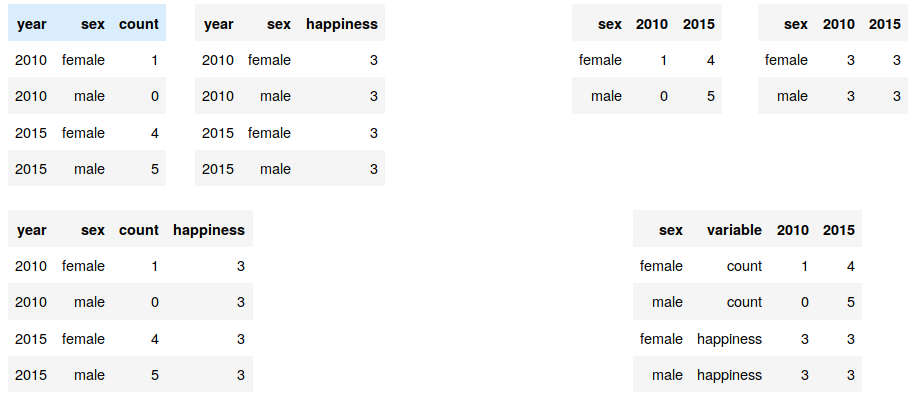

In [6]:
Image("./figures/datasets.png")

## 3 Tidying messy datasets
Real datasets can, and often do, violate the three precepts of tidy data in almost every way
imaginable. While occasionally you do get a dataset that you can start analysing immediately,
this is the exception,  not the rule:
- Column headers are values, not variable names --> Melt
- Multiple variables are stored in one column --> Pivot
- Variables are stored in both rows and columns --> Melt then pivot

Melting


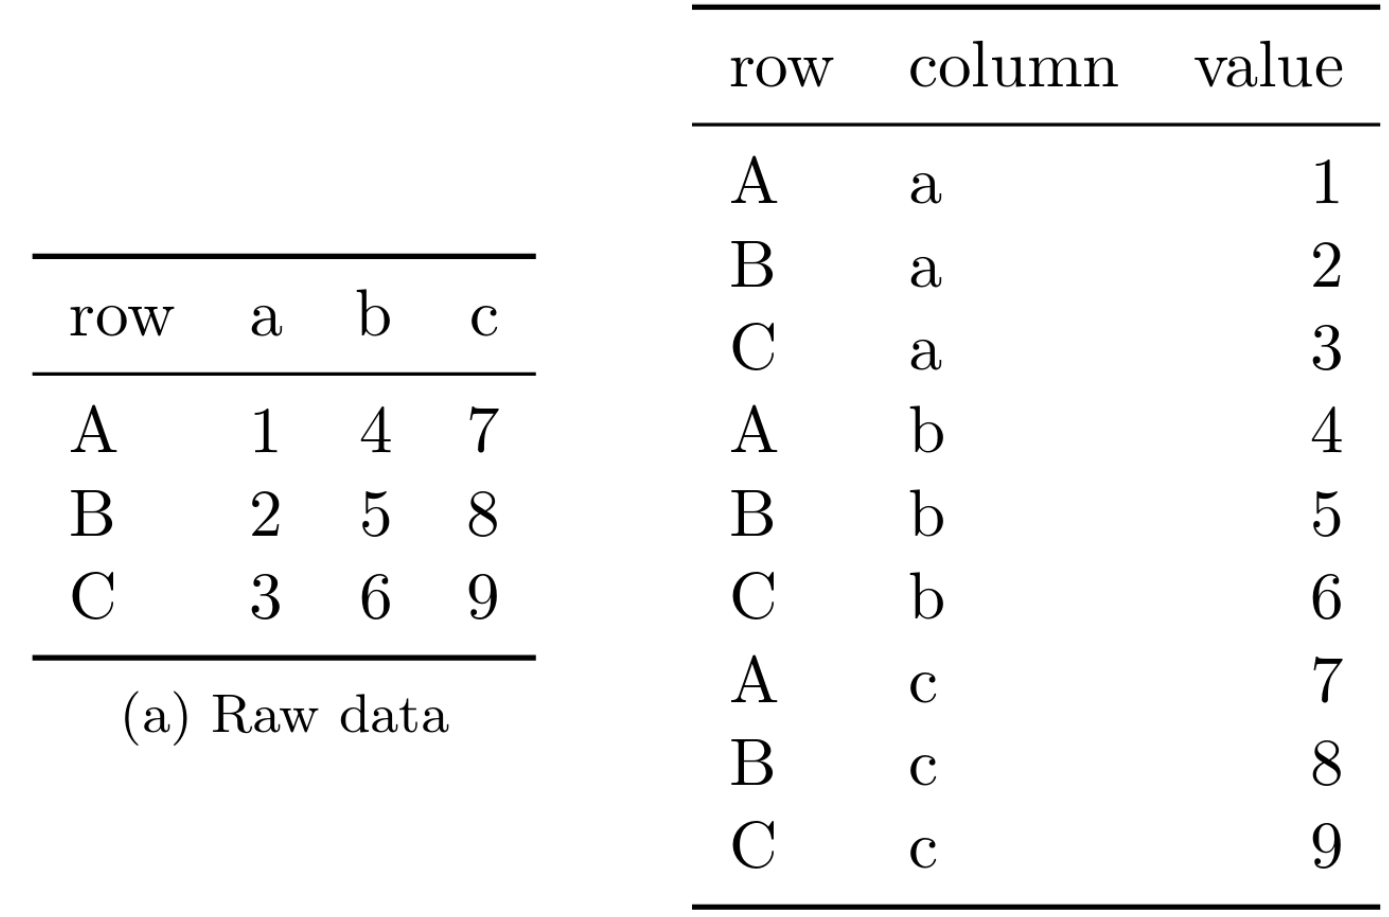

In [7]:
#Example of melting (columns to rows)
print("Melting")
Image("figures/melt.png",width=400)

Pivoting


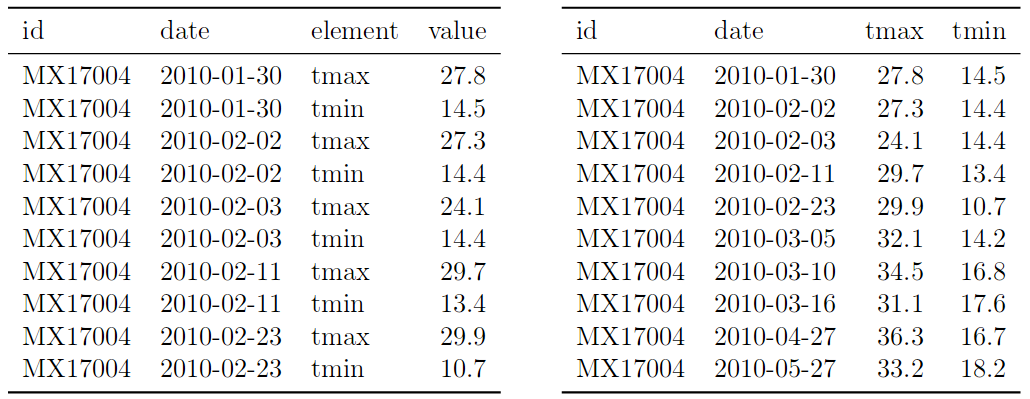

In [8]:
#Example of pivoting (rows to columns)
print("Pivoting")
Image("figures/pivot.png",width=800)

---

**Data to study: variations of https://stats.oecd.org/Index.aspx?DataSetCode=CITIES (which has problem 2)**

### 3.1 Column headers are values, not variable names: MELT

In [9]:
#Data on population density by year
df = pd.read_csv("data/columns_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
1,1,AT002,Graz,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
2,2,AT003,Linz,165.29,165.94,166.60,167.27,167.94,168.62,169.31,170.00,170.70,171.41,172.12,172.84,173.57,174.31,175.05
3,3,AUS,Australia,2.47,2.50,2.53,2.56,2.59,2.62,2.65,2.70,2.76,2.82,2.86,2.90,2.95,3.00,3.05
4,4,AUS01,Sydney,332.15,335.48,338.18,340.38,342.20,344.88,348.04,353.71,360.58,367.35,372.51,376.88,382.38,388.94,395.83


In [10]:
### Fix

#Variables present in columns already
variables_already_presents = ['METRO_ID', 'Metropolitan areas']

#Variables to combine in one
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']

#Fix
fixed = pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="POP_DENS")
fixed.head(10)

,METRO_ID,Metropolitan areas,Year,POP_DENS
0,AT001,Vienna,2000,267.27
1,AT002,Graz,2000,179.92
2,AT003,Linz,2000,165.29
3,AUS,Australia,2000,2.47
4,AUS01,Sydney,2000,332.15
5,AUS02,Melbourne,2000,342.35
6,AUS03,Brisbane,2000,107.48
7,AUS04,Perth,2000,226.80
8,AUS05,Adelaide,2000,351.60
9,AUS06,Gold Coast-Tweed Heads,2000,210.14


### 3.2 Multiple variables are stored in one column: PIVOT_TABLE

In [11]:
#Actual data from OECD
df = pd.read_csv("data/multiple_variables.csv")
df.head(2)

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,AT001,Vienna,POP_DENS,Population density (persons per km2),2000,2000,RATIO,Ratio,0,Units,NaN,NaN,267.27,NaN,NaN
1,1,AT001,Vienna,POP_DENS,Population density (persons per km2),2001,2001,RATIO,Ratio,0,Units,NaN,NaN,269.90,NaN,NaN


In [16]:
df.pivot_table?

In [12]:
### Fix

#Columns already present
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]

#Column with the variables
column_to_split = ["VAR"]

#Column with the values
column_with_values = "Value"

#Fix
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)

display(df_fixed.head())



VAR                               GREEN_AREA_PC  POP_DENS
METRO_ID Metropolitan areas Year                         
AT001    Vienna             2000         255.17    267.27
                            2001         252.68    269.90
                            2002         250.22    272.56
                            2003         247.77    275.26
                            2004         245.34    277.99

In [13]:
#use .reset_index() to convert index to columns
df_fixed = df_fixed.reset_index()
df_fixed.head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


### 3.3 Variables are stored in both rows and columns: MELT then PIVOT

In [14]:
df = pd.read_csv("data/multiple_variables_and_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,GREEN_AREA_PC,255.17,252.68,250.22,247.77,245.34,242.92,240.53,238.15,235.79,233.44,231.12,228.81,226.52,224.24,221.99
1,1,AT001,Vienna,POP_DENS,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
2,2,AT002,Graz,GREEN_AREA_PC,997.39,988.23,979.10,969.96,960.85,951.75,942.72,933.67,924.67,915.69,906.73,897.83,888.95,880.11,871.29
3,3,AT002,Graz,POP_DENS,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
4,4,AT003,Linz,GREEN_AREA_PC,1791.92,1784.87,1777.80,1770.71,1763.59,1756.49,1749.38,1742.23,1735.10,1727.91,1720.77,1713.59,1706.40,1699.20,1691.99


In [15]:
cols = list(df.columns)[4:]
print(list(df.columns)[4:])

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [16]:
### Fix setp 1
variables_already_presents = ['METRO_ID', 'Metropolitan areas','VAR']
columns_combine = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
df = pd.melt(df,
           id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="Value")
df.head()

,METRO_ID,Metropolitan areas,VAR,Year,Value
0,AT001,Vienna,GREEN_AREA_PC,2000,255.17
1,AT001,Vienna,POP_DENS,2000,267.27
2,AT002,Graz,GREEN_AREA_PC,2000,997.39
3,AT002,Graz,POP_DENS,2000,179.92
4,AT003,Linz,GREEN_AREA_PC,2000,1791.92


In [17]:
### Fix step 2
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


## 4. Merging and concatenating datasets
Concatenate:
- Some times you obtain more data (with the same variables or different)

Merging:
- Many times you have several datasets that you have to combine according to a shared variable

### 4.1 Concatenate files (add more observations)

In [3]:
#Add more observations
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png")

In [19]:
madrid = pd.read_csv("data/mad_twovariables.csv").head(2)
amsterdam = pd.read_csv("data/ams_twovariables.csv").head(2)
display(madrid)
display(amsterdam)



,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.5,471.88
1,ES001,Madrid,2001,31.0,479.60


,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


In [20]:
combined = pd.concat([madrid,amsterdam])
combined

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.50,471.88
1,ES001,Madrid,2001,31.00,479.60
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


**Note that it's not a problem if the variables are not all the same**

But in that case you'll have missing values

In [21]:
a = pd.DataFrame([[1,2],[3,4]],columns=["a","b"])
b = pd.DataFrame([[1,2],[3,4]],columns=["c","b"])
display(a)
display(b)


,a,b
0,1,2
1,3,4


,c,b
0,1,2
1,3,4


In [22]:
pd.concat([a,b])

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c
0,1.0,2,NaN
1,3.0,4,NaN
0,NaN,2,1.0
1,NaN,4,3.0


### 4.2 Merge datasets

In [4]:
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png",width=700)

In [24]:
ams_green = pd.read_csv("data/ams_green.csv")
ams_pop = pd.read_csv("data/ams_popdens.csv")
display(ams_green.head(2))
display(ams_pop.head(2))

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC
0,NL002,Amsterdam,2000,235.63
1,NL002,Amsterdam,2001,233.57


,METRO_ID,Metropolitan areas,Year,POP_DENS
0,NL002,Amsterdam,2000,764.71
1,NL002,Amsterdam,2001,771.45


In [25]:
# combined = pd.merge(ams_green,ams_pop,
#          left_on=["METRO_ID","Metropolitan areas","Year"],
#          right_on=["METRO_ID","Metropolitan areas","Year"],
#          how="inner")
# combined.head()

combined = pd.merge(ams_green,ams_pop,
         on=["METRO_ID","Metropolitan areas","Year"],
         how="inner")
combined.head()



,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45
2,NL002,Amsterdam,2002,231.51,778.30
3,NL002,Amsterdam,2003,229.46,785.26
4,NL002,Amsterdam,2004,227.41,792.34


In [5]:
print("Inner join pd.merge(left_df,right_df,how=\"inner\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_inner.png"))
print("Right join pd.merge(left_df,right_df,how=\"right\")", "The same with left")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_right.png"))
print("Outer join pd.merge(left_df,right_df,how=\"outer\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_outer.png"))

Inner join pd.merge(left_df,right_df,how="inner")


Right join pd.merge(left_df,right_df,how="right") The same with left


Outer join pd.merge(left_df,right_df,how="outer")


In [10]:
a = pd.DataFrame([[1,"a1"],[2,"a2"]],columns=["key","a"])
b = pd.DataFrame([[1,"b1"],[3,"b3"]],columns=["key","b"])
display(a)
display(b)


,key,a
0,1,a1
1,2,a2


,key,b
0,1,b1
1,3,b3


In [11]:
#Inner join
pd.merge(a,b,how="inner")

,key,a,b
0,1,a1,b1


In [12]:
#Left join
pd.merge(a,b,how="left")

,key,a,b
0,1,a1,b1
1,2,a2,NaN


In [13]:
#Right join
pd.merge(a,b,how="right")

,key,a,b
0,1,a1,b1
1,3,NaN,b3


In [14]:
#Outer join
pd.merge(a,b,how="outer")

,key,a,b
0,1,a1,b1
1,2,a2,NaN
2,3,NaN,b3


## 5. "Real" example. Find relationship between green area in a city and density of population

In [27]:
def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

In [28]:
#Read and fix the data
df_fixed = read_our_csv()
df_fixed = df_fixed.loc[df_fixed["Year"]==2000,["GREEN_AREA_PC","POP_DENS"]]    
df_fixed.head()

VAR,GREEN_AREA_PC,POP_DENS
0,255.17,267.27
15,997.39,179.92
30,1791.92,165.29
45,NaN,2.47
60,55.38,332.15


###  SCATTER using sns.lmplot
Use to plot the relationship between two quantitative variables (and one qualitative variable using color)
- x = x axis
- y = y axis

Text(-2.450000000000003, 0.5, 'Density population (people/km^2)')

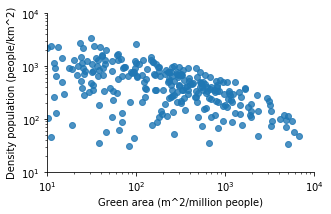

In [29]:
sns.lmplot(x="GREEN_AREA_PC",y="POP_DENS",data=df_fixed,fit_reg=False,size=3,aspect=1.6)

plt.yscale("log")
plt.xscale("log")
plt.ylim(10,10000)
plt.xlim(10,10000)
plt.xlabel("Green area (m^2/million people)")
plt.ylabel("Density population (people/km^2)")


### Is there a relationship between green area per capita and population density? Why?

---

**To calculate the fraction of green area**

$$\frac{m^2_{green}}{people} \cdot \frac{people}{km^2_{city}} = \frac{m^2_{green}}{km^2_{city}}$$

In [30]:
#fraction of green area
df_fixed["fraction_green"] = df_fixed["GREEN_AREA_PC"]*df_fixed["POP_DENS"]/1E6

Text(-2.450000000000003, 0.5, 'Density population (population/km^2)')

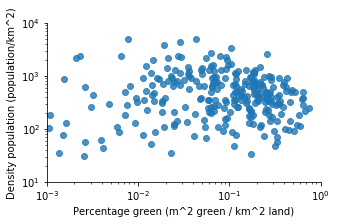

In [31]:
#make the figure
sns.lmplot(x="fraction_green",y="POP_DENS",data=df_fixed,fit_reg=False,size=3,aspect=1.6)
plt.yscale("log")
plt.xscale("log")
plt.ylim(10,10000)
plt.xlim(0.001,1)
plt.xlabel("Percentage green (m^2 green / km^2 land)")
plt.ylabel("Density population (population/km^2)")

In [32]:
df_fixed["log_fraction_green"]  = np.log10(df_fixed["fraction_green"])
df_fixed["log_POP_DENS"]  = np.log10(df_fixed["POP_DENS"])

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(6.674999999999997, 0.5, 'Density population (population/km^2)')

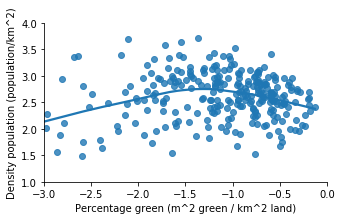

In [33]:
#make the figure
sns.lmplot(x="log_fraction_green",y="log_POP_DENS",data=df_fixed,lowess=True,size=3,aspect=1.6)
plt.ylim(1,4)
plt.xlim(-3,0)
plt.xlabel("Percentage green (m^2 green / km^2 land)")
plt.ylabel("Density population (population/km^2)")

-----------